<a href="https://www.kaggle.com/code/ranxi169/digit-recognizer-with-cnn-for-beginner?scriptVersionId=102231034" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 准备工作

## 数据集介绍

数据文件 train.csv 和 test.csv 包含从零到九的手绘数字的灰度图像。

每张图像高 28 像素，宽 28 像素，总共 784 像素。每个像素都有一个与之关联的像素值，表示该像素的亮度或暗度，数字越大表示越暗。该像素值是介于 0 和 255 之间的整数，包括 0 和 255。

训练数据集 (train.csv) 有 785 列。第一列称为“标签”，是用户绘制的数字。其余列包含相关图像的像素值。

训练集中的每个像素列都有一个类似 pixelx 的名称，其中 x 是 0 到 783 之间的整数，包括 0 到 783。要在图像上定位该像素，假设我们已将 x 分解为 x = i * 28 + j，其中 i 和 j 是 0 到 27 之间的整数，包括 0 和 27。然后 pixelx 位于 28 x 28 矩阵的第 i 行和第 j 列（索引为零）。

例如，pixel31 表示左数第四列、上数第二行的像素，如下面的 ascii 图表所示。

从视觉上看，如果我们省略“像素”前缀，像素组成图像如下：

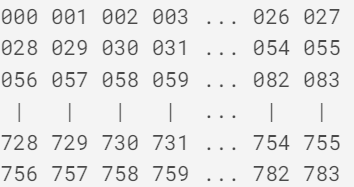

测试数据集 (test.csv) 与训练集相同，只是它不包含“标签”列。

您的提交文件应采用以下格式：对于测试集中的 28000 张图像中的每一张，输出一行包含 ImageId 和您预测的数字。例如，如果您预测第一张图像是 3，第二张图像是 7，第三张图像是 8，那么您的提交文件将如下所示：

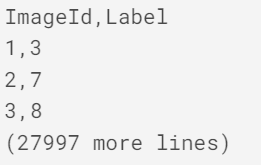

本次比赛的评价指标是分类准确率，或者说测试图像被正确分类的比例。例如，0.97 的分类准确度表示您已正确分类除 3% 的图像之外的所有图像。

## 导入包

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 读取数据集

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
test = pd.read_csv('../input/digit-recognizer/test.csv')

## 查看数据特征

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
sum(train.isnull().sum())

0

# 预处理训练集|测试集

In [8]:
#y_train 是数字标签
y_train = train['label'].copy()

In [9]:
#X_train 是各像素亮度值
X_train = train.drop('label',axis=1)

In [10]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [11]:
y_train = pd.get_dummies(y_train,prefix='Num')

In [12]:
y_train.head()

,Num_0,Num_1,Num_2,Num_3,Num_4,Num_5,Num_6,Num_7,Num_8,Num_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [13]:
#28×28一共784个像素，其中的数值表示亮度[0,255]
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [14]:
#from sklearn.preprocessing import Normalizer

In [15]:
X_train = X_train/255

In [16]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [18]:
X_train = X_train.values.reshape(-1,28,28,1)

In [19]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [21]:
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [22]:
sum(test.isnull().sum())

0

In [23]:
test = test/255

In [24]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000646,0.000287,0.000110,0.000044,0.000026,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021464,0.014184,0.007112,0.004726,0.003167,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.996078,0.756863,0.733333,0.466667,0.0,0.0,0.0,0.0,0.0


In [26]:
test = test.values.reshape(-1,28,28,1)

In [27]:
test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# CNN Model

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.6.4'

In [30]:
cnn = tf.keras.models.Sequential()

2022-08-01 06:30:40.072236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 06:30:40.178259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 06:30:40.179091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 06:30:40.181350: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [31]:
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))

In [32]:
#Max Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=3))

In [33]:
cnn.add(tf.keras.layers.BatchNormalization())

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(4,4),activation='relu'))

In [35]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

In [36]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [37]:
#Full connection 
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [38]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [39]:
#Compile cnn
cnn.compile(optimizer='adam',loss='categorical_crossentropy')

In [40]:
# Epoch（时期）：
# 当一个完整的数据集通过了神经网络一次并且返回了一次，这个过程称为一次>epoch。（也就是说，所有训练样本在神经网络中都 进行了一次正向传播 和一次反向传播 ）
# 再通俗一点，一个Epoch就是将所有训练样本训练一次的过程。
# 然而，当一个Epoch的样本（也就是所有的训练样本）数量可能太过庞大（对于计算机而言），就需要把它分成多个小块，也就是就是分成多个Batch 来进行训练。**

# Batch（批 / 一批样本）：
# 将整个训练样本分成若干个Batch。

# Batch_Size（批大小）：
# 每批样本的大小。

# Iteration（一次迭代）：
# 训练一个Batch就是一次Iteration（这个概念跟程序语言中的迭代器相似）。

cnn.fit(X_train,y_train,batch_size=32,epochs=50)

2022-08-01 06:30:43.412408: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-08-01 06:30:44.785115: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1313/1313 [==============================] - 13s 4ms/step - loss: 0.1203
Epoch 2/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0497
Epoch 3/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0367
Epoch 4/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0312
Epoch 5/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0228
Epoch 6/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0224
Epoch 7/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0202
Epoch 8/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0169
Epoch 9/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0162
Epoch 10/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0149
Epoch 11/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0151
Epoch 12/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0108
Epoch 13/50

In [41]:
pred = cnn.predict(test)

In [42]:
pred = np.argmax(pred,axis=1)

In [43]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [44]:
pred = pd.DataFrame(pred,columns=['Label'])

In [45]:
test_id = list(range(1,len(test)+1,1))

In [46]:
test_id = pd.DataFrame(test_id,columns=['ImageId'])

In [47]:
submission = pd.concat([test_id,pred],axis=1)

In [48]:
submission.describe()

,ImageId,Label
count,28000.000000,28000.000000
mean,14000.500000,4.438179
std,8083.048105,2.894091
min,1.000000,0.000000
25%,7000.750000,2.000000
50%,14000.500000,4.000000
75%,21000.250000,7.000000
max,28000.000000,9.000000


In [49]:
submission.to_csv('./submission.csv',index=False)